# In Class Notebook, Week 03

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week03/inClass_week03.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

I am typing a thing here!

In [1]:
# import usual libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from PIL import Image

Fix today's Stictch link!

In [60]:
#img = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png")
img = Image.open("stitch_reworked.png")

#Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png").convert('RGB')

In [4]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [5]:
imgdata = np.array(img)

In [6]:
type(imgdata)

numpy.ndarray

In [7]:
#imgdata
imgdata.shape

(483, 430, 4)

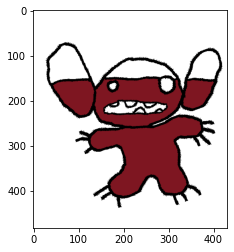

In [8]:
plt.imshow(imgdata)

In [9]:
np.unique(imgdata)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [10]:
# unwrap my image data into pixel color values (RGBA), R=red channel, G=green channel, B=blue, A=alpha (opacity)
imgdata.reshape(-1,imgdata.shape[2]) #-1 is saying figure it out reshape function, based on that I want data in 4's

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [11]:
imgdata.reshape?

In [12]:
np.reshape?

In [13]:
imgdata.shape[2]

4

In [14]:
np.unique(imgdata.reshape(-1,imgdata.shape[2]),axis=0) # so look for unique values along all pixels

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [15]:
np.unique?

In [16]:
imgdata.reshape(-1,imgdata.shape[2]).shape

(207690, 4)

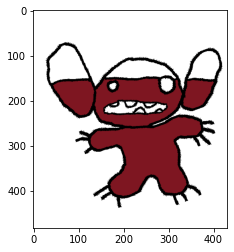

In [17]:
plt.imshow(imgdata)
plt.show()

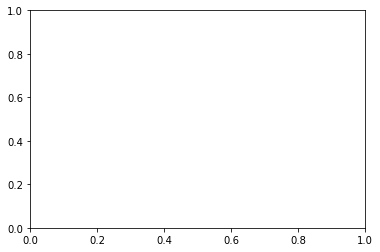

In [18]:
fig, ax = plt.subplots()

In [19]:
ax

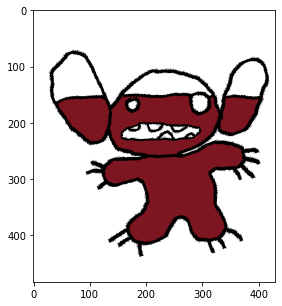

In [20]:
fig, ax = plt.subplots(figsize=(5,5)) # width, height
ax.imshow(imgdata)
plt.show()

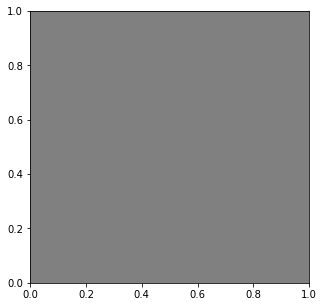

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor('gray')
plt.show()

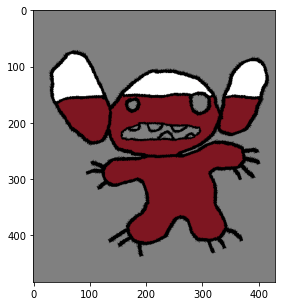

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor('gray')
ax.imshow(imgdata)
plt.show()

In [23]:
red_good_mask = imgdata[:,:,0] == 255

In [24]:
red_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [25]:
np.unique(imgdata.reshape(-1,imgdata.shape[2]),axis=0) # so look for unique values along all pixels

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [26]:
red_good_mask = imgdata[:,:,0] == 255
green_good_mask = imgdata[:,:,1] == 255
blues_good_mask = imgdata[:,:,2] == 255
alpha_good_mask = imgdata[:,:,3] == 255

pixel_good_mask = red_good_mask & green_good_mask & blues_good_mask & alpha_good_mask

In [27]:
good_pixels = imgdata[pixel_good_mask]

In [28]:
good_pixels

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [29]:
# how many "good" pixels?
ngood = len(good_pixels)
ngood

11929

In [30]:
imgdata_good = imgdata.copy() # copy of original image

In [31]:
imgdata_good[~pixel_good_mask] = 0 # all other pixels outside of "good" mask

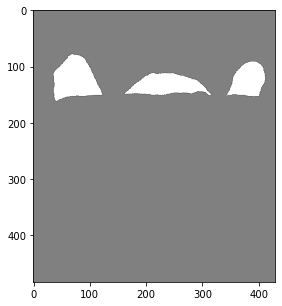

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor('gray')
ax.imshow(imgdata_good)
plt.show()

In [33]:
np.unique(imgdata.reshape(-1,imgdata.shape[2]),axis=0) # so look for unique values along all pixels

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

So some of the errors were missing "=" and also missing () around each interior boolean statement.

In [34]:
pixel_mask_bad = (imgdata[:,:,0]==126) & (imgdata[:,:,1]==22) & (imgdata[:,:,2]==33) & (imgdata[:,:,3]==255)

In [35]:
nbad = len(imgdata[pixel_mask_bad])
nbad

40949

In [36]:
imgdata_bad = imgdata.copy()
imgdata_bad[~pixel_mask_bad] = 0

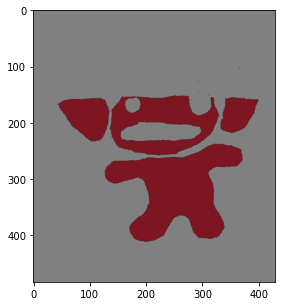

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor('gray')
ax.imshow(imgdata_bad)
plt.show()

In [38]:
total = ngood+nbad
badness = nbad/total
goodness = ngood/total
print(badness,goodness)

0.774405234691176 0.22559476530882408


## RGB decomposition for the homework

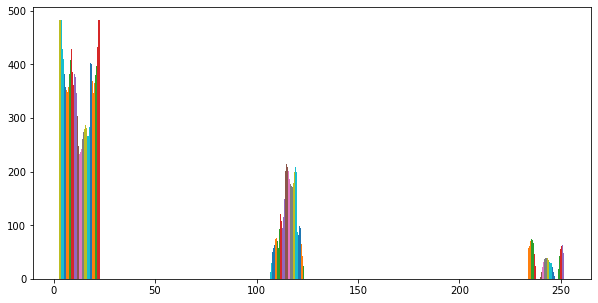

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imgdata[:,:,0]) # how many pixels have each of the 3 different channel values
plt.show()

In [40]:
imgdata[:,:,0].shape

(483, 430)

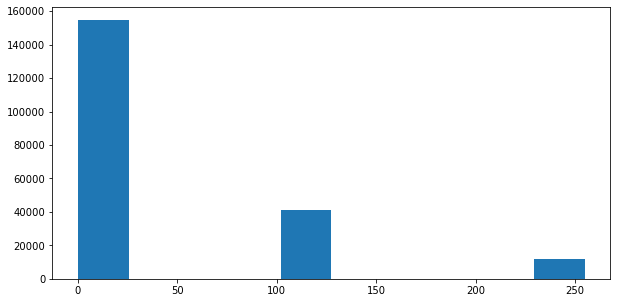

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imgdata[:,:,0].flatten()) # how many pixels have each of the 3 different channel values
plt.show()

In [42]:
imgdata[:,:,0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

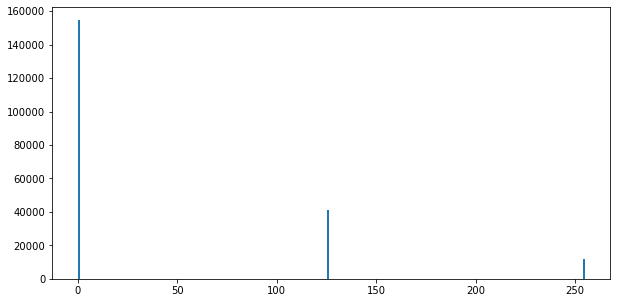

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imgdata[:,:,0].flatten(),bins=256) # how many pixels have each of the 3 different channel values
plt.show()

In [44]:
ax.hist?

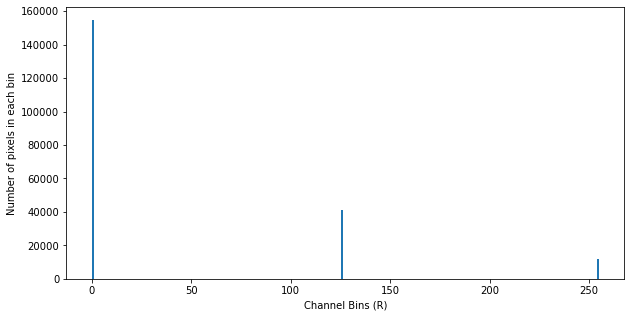

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imgdata[:,:,0].flatten(),bins=256) # how many pixels have each of the 3 different channel values

ax.set_xlabel('Channel Bins (R)')
ax.set_ylabel('Number of pixels in each bin')

plt.show()

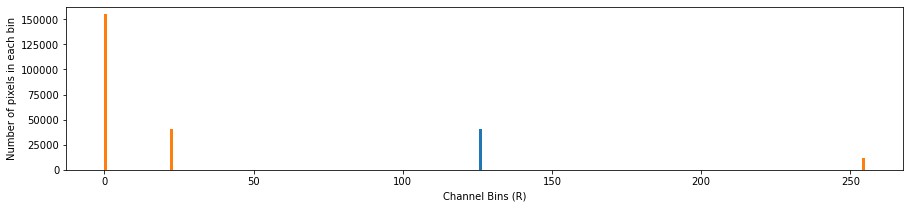

In [46]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(imgdata[:,:,0].flatten(),bins=256) # 0=Red channel
ax.hist(imgdata[:,:,1].flatten(),bins=256) # 1=Green channel

ax.set_xlabel('Channel Bins (R)')
ax.set_ylabel('Number of pixels in each bin')

plt.show()

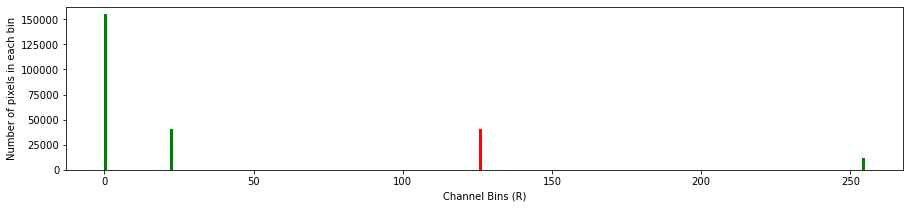

In [47]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(imgdata[:,:,0].flatten(),bins=256,color='red') # 0=Red channel
ax.hist(imgdata[:,:,1].flatten(),bins=256,color='green') # 1=Green channel

ax.set_xlabel('Channel Bins (R)')
ax.set_ylabel('Number of pixels in each bin')

plt.show()

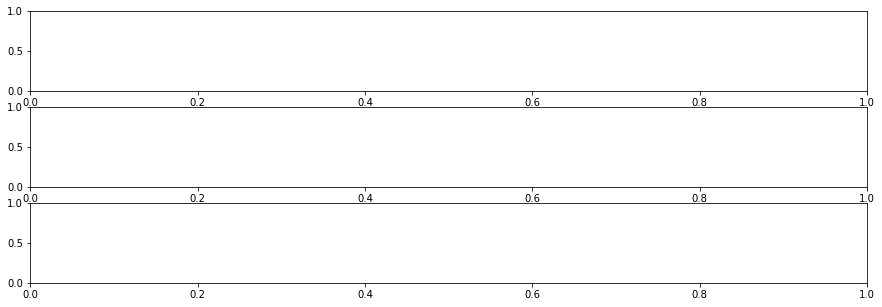

In [48]:
fig, ax = plt.subplots(3,1, figsize=(15,5)) # now we have 3 rows and 1 column

In [49]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc515d7e90>,
      dtype=object)

In [50]:
ax[0]

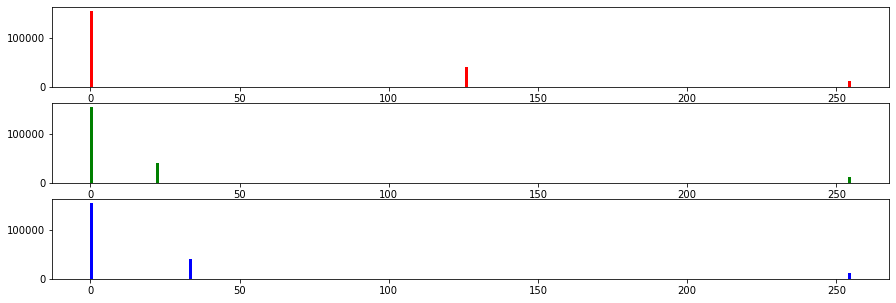

In [51]:
fig, ax = plt.subplots(3,1, figsize=(15,5)) # now we have 3 rows and 1 column

ax[0].hist(imgdata[:,:,0].flatten(),bins=256,color='red') # 0=Red channel
ax[1].hist(imgdata[:,:,1].flatten(),bins=256,color='green') #1=Green channel
ax[2].hist(imgdata[:,:,2].flatten(),bins=256,color='blue') #2=Blue channel

plt.show()

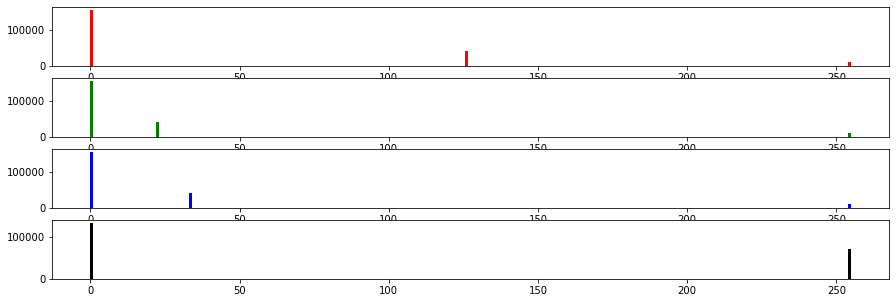

In [52]:
fig, ax = plt.subplots(4,1, figsize=(15,5)) # now we have 3 rows and 1 column

ax[0].hist(imgdata[:,:,0].flatten(),bins=256,color='red') # 0=Red channel
ax[1].hist(imgdata[:,:,1].flatten(),bins=256,color='green') #1=Green channel
ax[2].hist(imgdata[:,:,2].flatten(),bins=256,color='blue') #2=Blue channel
ax[3].hist(imgdata[:,:,3].flatten(),bins=256,color='black') # 3=Alpha channel

plt.show()

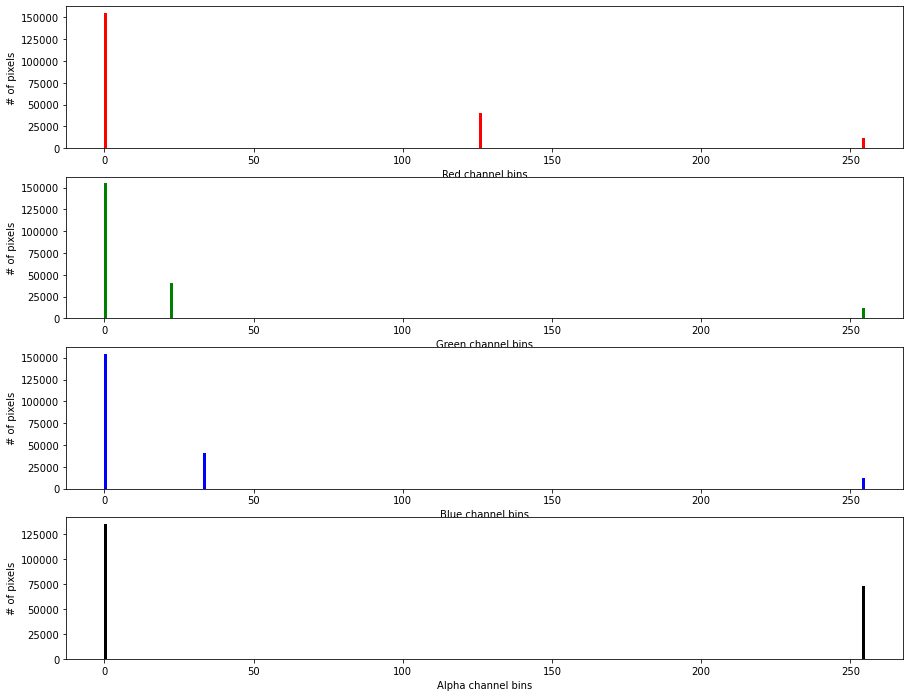

In [53]:
fig, ax = plt.subplots(4,1, figsize=(15,12)) # now we have 3 rows and 1 column

ax[0].hist(imgdata[:,:,0].flatten(),bins=256,color='red') # 0=Red channel
ax[1].hist(imgdata[:,:,1].flatten(),bins=256,color='green') #1=Green channel
ax[2].hist(imgdata[:,:,2].flatten(),bins=256,color='blue') #2=Blue channel
ax[3].hist(imgdata[:,:,3].flatten(),bins=256,color='black') # 3=Alpha channel

# label x-axis
ax[0].set_xlabel('Red channel bins')
ax[1].set_xlabel('Green channel bins')
ax[2].set_xlabel('Blue channel bins')
ax[3].set_xlabel('Alpha channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel("# of pixels")
ax[3].set_ylabel('# of pixels')

plt.show()

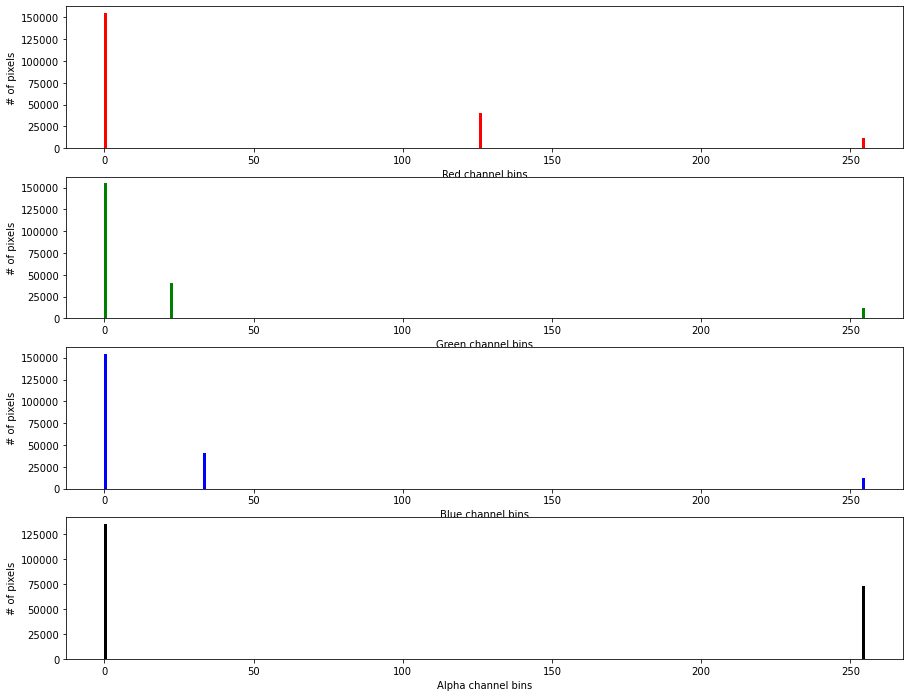

In [54]:
fig, ax = plt.subplots(4,1, figsize=(15,12)) # now we have 3 rows and 1 column

ax[0].hist(imgdata[:,:,0].flatten(),bins=256,color='red') # 0=Red channel
ax[1].hist(imgdata[:,:,1].flatten(),bins=256,color='green') #1=Green channel
ax[2].hist(imgdata[:,:,2].flatten(),bins=256,color='blue') #2=Blue channel
ax[3].hist(imgdata[:,:,3].flatten(),bins=256,color='black') # 3=Alpha channel

# label x-axis
ax[0].set_xlabel('Red channel bins')
ax[1].set_xlabel('Green channel bins')
ax[2].set_xlabel('Blue channel bins')
ax[3].set_xlabel('Alpha channel bins')

for i in range(4): ax[i].set_ylabel('# of pixels')

plt.show()

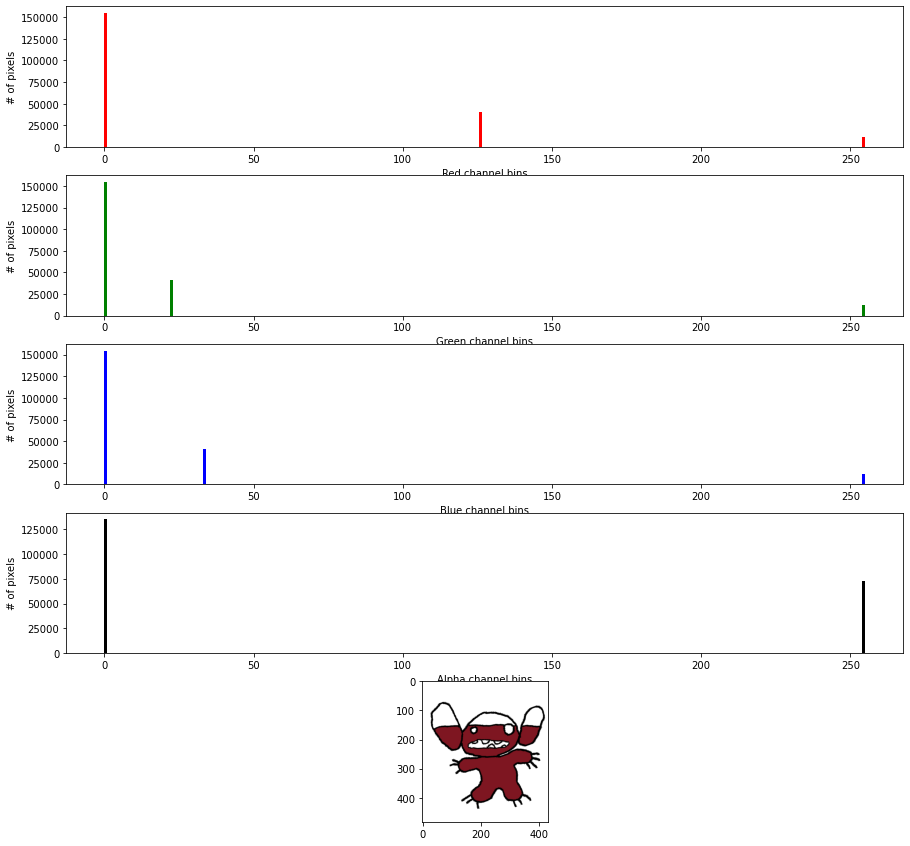

In [55]:
fig, ax = plt.subplots(5,1, figsize=(15,15)) # now we have 3 rows and 1 column

ax[0].hist(imgdata[:,:,0].flatten(),bins=256,color='red') # 0=Red channel
ax[1].hist(imgdata[:,:,1].flatten(),bins=256,color='green') #1=Green channel
ax[2].hist(imgdata[:,:,2].flatten(),bins=256,color='blue') #2=Blue channel
ax[3].hist(imgdata[:,:,3].flatten(),bins=256,color='black') # 3=Alpha channel

# label x-axis
ax[0].set_xlabel('Red channel bins')
ax[1].set_xlabel('Green channel bins')
ax[2].set_xlabel('Blue channel bins')
ax[3].set_xlabel('Alpha channel bins')

for i in range(4): ax[i].set_ylabel('# of pixels')
    
ax[4].imshow(imgdata)

plt.show()

## Some fancy layout ideas

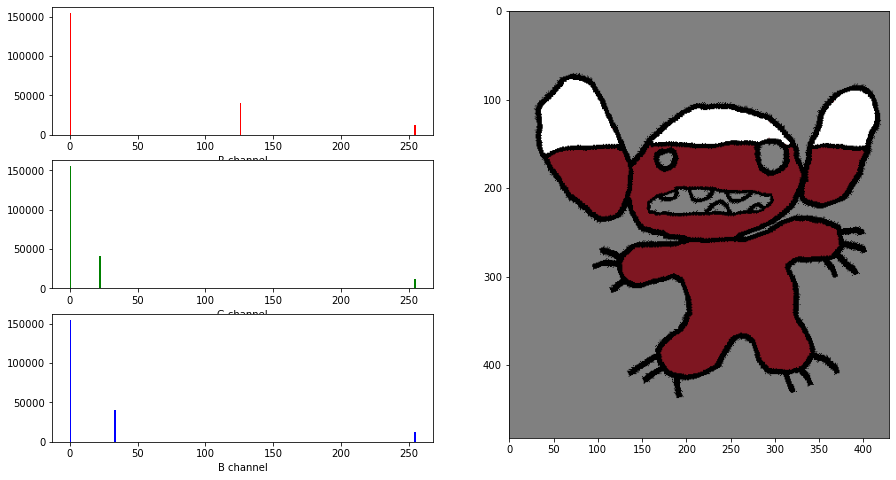

In [61]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3,2) # three rows (3 color histograms), 2 columns (histograms on the left, fig on right)

ax1 = fig.add_subplot(gs[0,0]) # upper left, plot red
ax1.hist(imgdata[:,:,0].flatten(),bins=256, color='red')
ax1.set_xlabel('R channel')

ax2 = fig.add_subplot(gs[1,0]) # middle row (1), first column (0) -- green
ax2.hist(imgdata[:,:,1].flatten(),bins=256,color="green")
ax2.set_xlabel('G channel')

ax3 = fig.add_subplot(gs[2,0]) # last row (2), first column (0) -- blue
ax3.hist(imgdata[:,:,2].flatten(),bins=256,color="blue")
ax3.set_xlabel('B channel')

# fancy part -- add in the image axes for all of the rows, and the 2nd column
ax4 = fig.add_subplot(gs[:,1]) # all rows (:), 2nd column (1) for the image
ax4.set_facecolor('gray')
ax4.imshow(imgdata)

plt.show()

Current mystery -- why is the 0 bin so tiny?

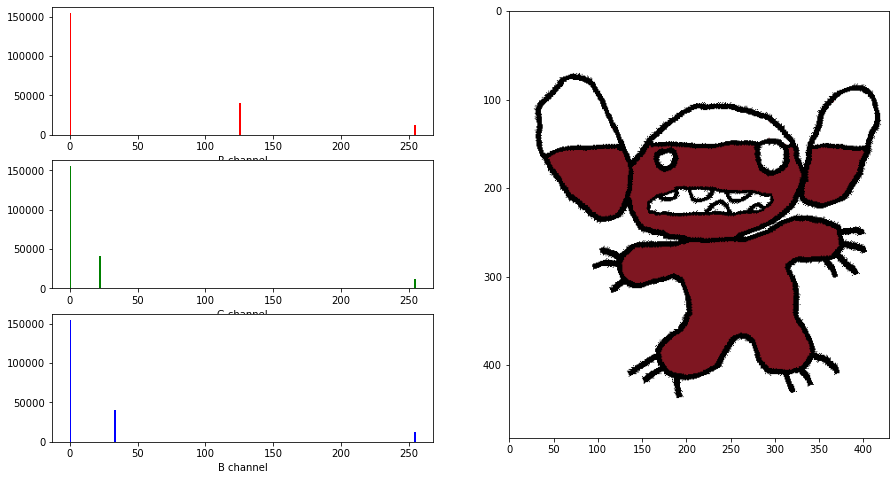

In [57]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3,2) # three rows (3 color histograms), 2 columns (histograms on the left, fig on right)

nbins = 257

ax1 = fig.add_subplot(gs[0,0]) # upper left, plot red
ax1.hist(imgdata[:,:,0].flatten(),bins=nbins, color='red')
ax1.set_xlabel('R channel')

ax2 = fig.add_subplot(gs[1,0]) # middle row (1), first column (0) -- green
ax2.hist(imgdata[:,:,1].flatten(),bins=nbins,color="green")
ax2.set_xlabel('G channel')

ax3 = fig.add_subplot(gs[2,0]) # last row (2), first column (0) -- blue
ax3.hist(imgdata[:,:,2].flatten(),bins=nbins,color="blue")
ax3.set_xlabel('B channel')

# fancy part -- add in the image axes for all of the rows, and the 2nd column
ax4 = fig.add_subplot(gs[:,1]) # all rows (:), 2nd column (1) for the image
ax4.imshow(imgdata)

plt.show()

In [58]:
fig.add_gridspec?

In [59]:
#fig.add_gridspec(nrows, ncols,)